Este cuaderno busca poner en práctica una regresión Lasso para la predicción de precios de casas.

# EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../db/data.csv")

In [4]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [9]:
df["price"] = df["price"].astype("int64")
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609430e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [11]:
df = df[df["price"] > 0]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   int64  
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float64(3)

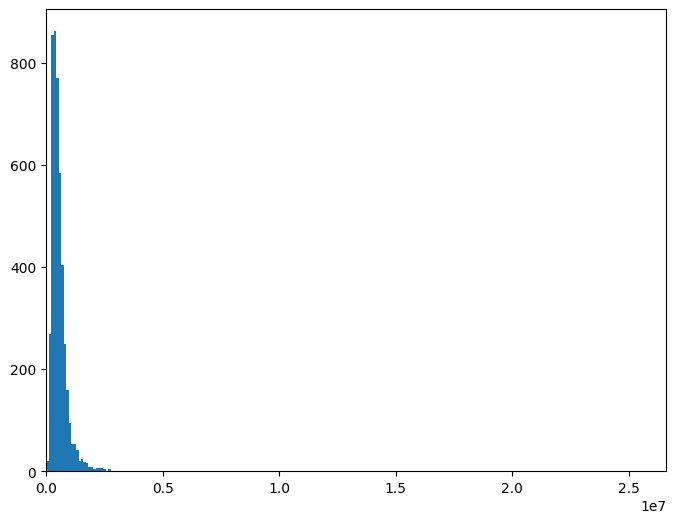

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(df["price"], bins=250)
plt.xlim((0, df["price"].max() + 1000))
plt.show()

Elegir el grado del polinomio para la regresión. Después, elegir las variables correctas.

In [27]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_numericas = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement']

df_modelo = scaler.fit_transform(df[cols_numericas])   

df_escalado = pd.DataFrame(df_modelo, columns=cols_numericas)
df_escalado

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,-0.434332,-0.436308,-0.843810,-0.828976,-0.192527,-0.022648,-0.08146,-0.306647,-0.665622,-0.564425,-0.671413
1,3.238514,1.774869,0.444408,1.587735,-0.160880,0.905905,-0.08146,4.920139,2.296965,1.811625,-0.065270
2,-0.382902,-0.436308,-0.199701,-0.211721,-0.080319,-0.951201,-0.08146,-0.306647,0.815672,0.126151,-0.671413
3,-0.244571,-0.436308,0.122354,-0.138487,-0.189245,-0.951201,-0.08146,-0.306647,0.815672,-0.962384,1.493385
4,-0.014021,0.669281,0.444408,-0.201259,-0.120558,-0.951201,-0.08146,-0.306647,0.815672,-0.798519,1.060425
...,...,...,...,...,...,...,...,...,...,...,...
4546,-0.442905,-0.436308,-0.521755,-0.651123,-0.235686,-0.951201,-0.08146,-0.306647,0.815672,-0.365446,-0.671413
4547,-0.041806,-0.436308,0.444408,-0.703433,-0.201954,0.905905,-0.08146,-0.306647,-0.665622,-0.423969,-0.671413
4548,-0.250062,-0.436308,0.444408,0.918170,-0.217499,0.905905,-0.08146,-0.306647,-0.665622,1.390257,-0.671413
4549,-0.628704,0.669281,-0.199701,-0.044330,-0.228177,-0.951201,-0.08146,-0.306647,-0.665622,-0.880452,1.536681
